<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# <font color='orange'> matplotlib의 여러가지 플롯
> 
matplotlib는 기본적인 라인 플롯 이외에도 다양한 챠트/플롯 유형을 지원한다. 


### 바 차트

x, y 데이터 중 하나가 카테고리 값인 경우에는 `bar` 명령과 `barh` 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용한다.

자세한 내용은 다음 웹사이트를 참조한다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

바 차트 작성시 주의점은 첫번째 인수인 `left` 가 x축에서 바(bar)의 왼쪽 변의 위치를 나타낸다는 점이다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

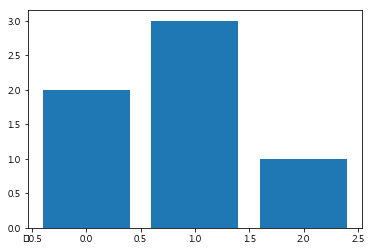

In [3]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['a', 'b', 'c']
plt.bar(x, y)
#plt.xticks(x, xlabel)
plt.show()

`xerr` 인수나 `yerr` 인수를 지정하면 에러 바(error bar)를 추가할 수 있다. 여기에서 `alpha`는 투명도를 지정한다. 0이면 완전 투명, 1이면 완전 불투명이다.

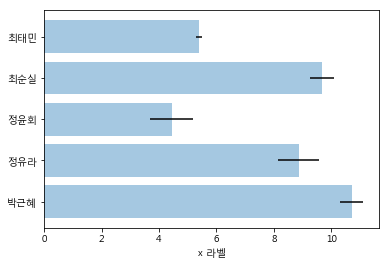

In [4]:
people = (u'박근혜', u'정유라', u'정윤회', u'최순실', u'최태민')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
#xerr - 에러 라인 
plt.barh(y_pos, performance, xerr=error,  alpha=0.4) # alpha - 투명도 설정
plt.yticks(y_pos, people)
plt.xlabel(u'x 라벨')
plt.show()

두 개 이상의 바 차트를 한번에 그리는 경우도 있다.

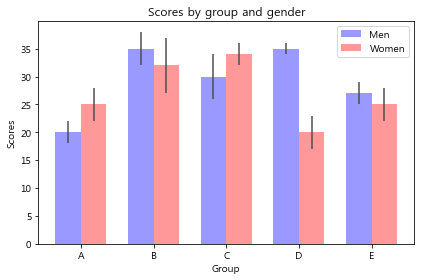

In [5]:
n_groups = 5
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men',
                 align='edge')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config, # error_kw : 에러 선 투명도
                 label='Women',
                 align='edge')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
plt.tight_layout()
plt.show()

또는 `bottom` 인수로 바의 위치를 조정하여 겹친 바 차트(stacked bar chart)도 그릴 수 있다.

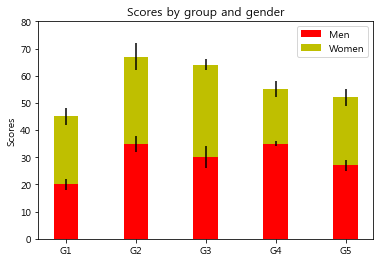

In [6]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()

### 연습 문제 1

여러분이 가진 데이터를 사용하여 bar plot을 그려보세요.

## 파이 차트

카테고리 별 값의 상대적인 비교를 해야 할 때는 `pie` 명령으로 파이 차트(pie chart)를 그릴 수 있다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

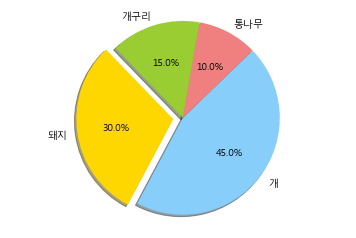

In [7]:
labels = u'개구리', u'돼지', u'개', u'통나무'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
plt.axis('equal')
plt.show()

### 연습 문제 2

여러분이 가진 데이터를 사용하여 파이차트를 그려보세요

## 히스토그램

히스토그램을 그리기 위한 `hist` 명령도 제공한다. `hist` 명령은 `bins` 인수로 데이터 집계 구간을 받는다. 또한 반환값으로 데이터 집계 결과를 반환해주므로 이 결과를 다른 코드에서 사용할 수도 있다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

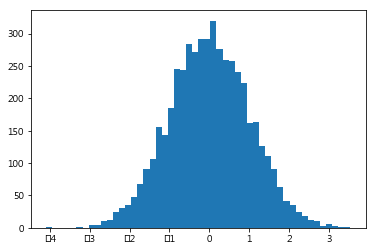

In [8]:
x = np.random.randn(5000)
plt.hist(x, bins=50)
plt.show()

## 스캐터 플롯

두 개의 데이터 집합, 예를 들면 두 벡터의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그린다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

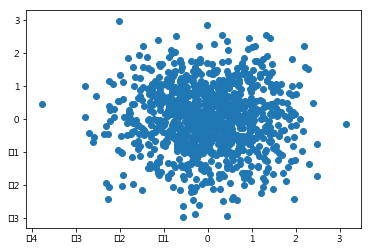

In [9]:
X = np.random.normal(0,1,1024)
Y = np.random.normal(0,1,1024)
plt.scatter(X,Y)
plt.show()

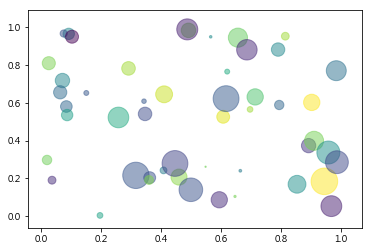

In [10]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

area = np.pi * (15 * np.random.rand(N))**2 
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Imshow

지금 까지는 1개 혹은 2개의 1차원 자료에 대한 시각화를 살펴보았다. 이제는 행과 열을 가진 2차원 데이터의 시각화에 대해 알아본다. 
예를 들어 화상(image) 데이터는 전형적인 2차원 자료이다. 

가장 간단한 2차원 자료 시각화 방법은 `imshow` 명령을 써서 2차원 자료 자체를 각 위치의 명암으로 표시하는 것이다. 자료의 시각화를 돕기위해 다양한 2차원 인터폴레이션을 지원한다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow


In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

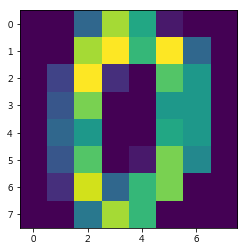

In [12]:
plt.imshow(X, interpolation='nearest');
plt.grid(False)
plt.show()

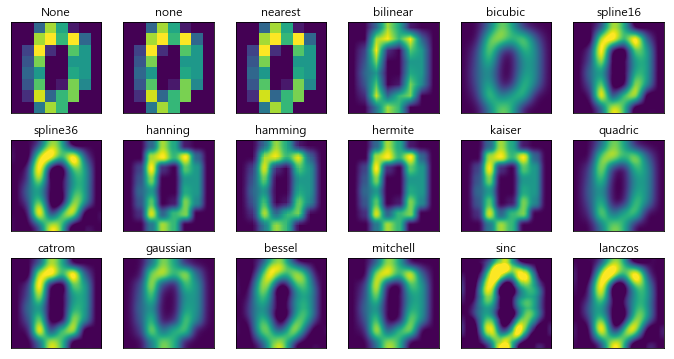

In [13]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(3, 6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>